# HSV Color Space, Balloons

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# change working directory
%cd drive/My Drive/Colab Notebooks/Computer Vision Nanodegree/CVND_Exercises/1_1_Image_Representation

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Computer Vision Nanodegree/CVND_Exercises/1_1_Image_Representation


### Import resources and display image

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

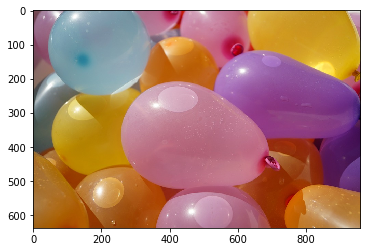

In [4]:
%matplotlib inline

# Read in the image
image = cv2.imread('images/water_balloons.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Plot color channels

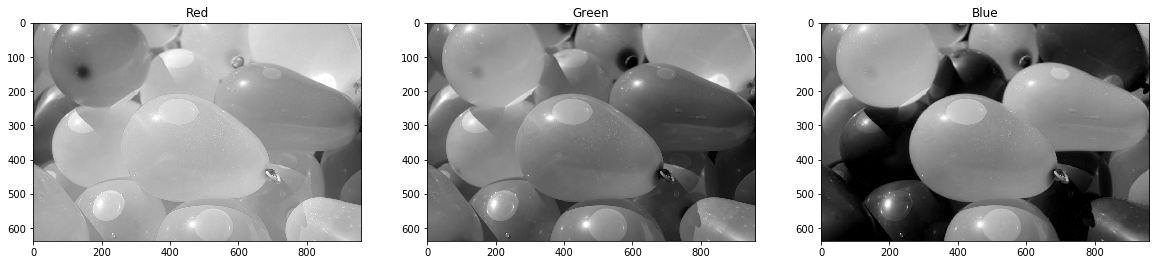

In [5]:
# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')


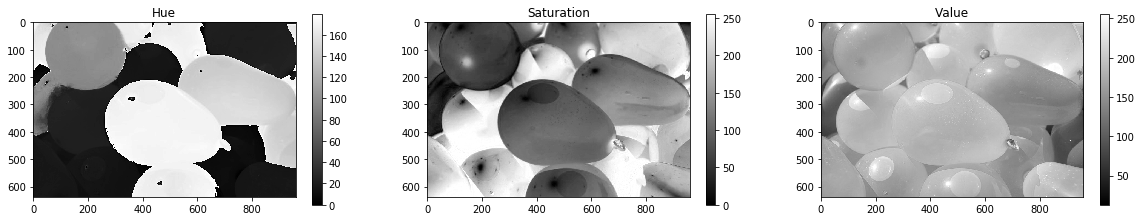

In [21]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
im1 = ax1.imshow(h, cmap='gray')
f.colorbar(im1, ax = ax1, shrink = 0.35)

ax2.set_title('Saturation')
im2 = ax2.imshow(s, cmap='gray')
f.colorbar(im2, ax = ax2, shrink = 0.35)

ax3.set_title('Value')
im3 = ax3.imshow(v, cmap='gray')
f.colorbar(im3, ax = ax3, shrink = 0.35)

### Define pink and hue selection thresholds

In [0]:
# Define our color selection criteria in HSV values
lower_hue = np.array([160,0,0]) 
upper_hue = np.array([180,255,255])


In [0]:
# Define our color selection criteria in RGB values
lower_pink = np.array([180,0,100]) 
upper_pink = np.array([255,255,230])

### Mask the image 

In [0]:
# Define the masked area in RGB space
mask_rgb = cv2.inRange(image, lower_pink, upper_pink)

# mask the image
masked_image = np.copy(image)
masked_image[mask_rgb==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

In [0]:
# Now try HSV!

# Define the masked area in HSV space
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image = np.copy(image)
masked_image[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)